In [1]:
!pip install torch==1.6.0 torchvision==0.7.0

     |████████████████████████████████| 5.9MB 4.1MB/s 
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [2]:
import os
import numpy as np
from PIL import Image
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
val_transforms_list = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [4]:
def load_img(path, transforms=None):
    img = Image.open(path)
    img = img.convert("RGB")
    if transforms:
        img = transforms(img)
    return img

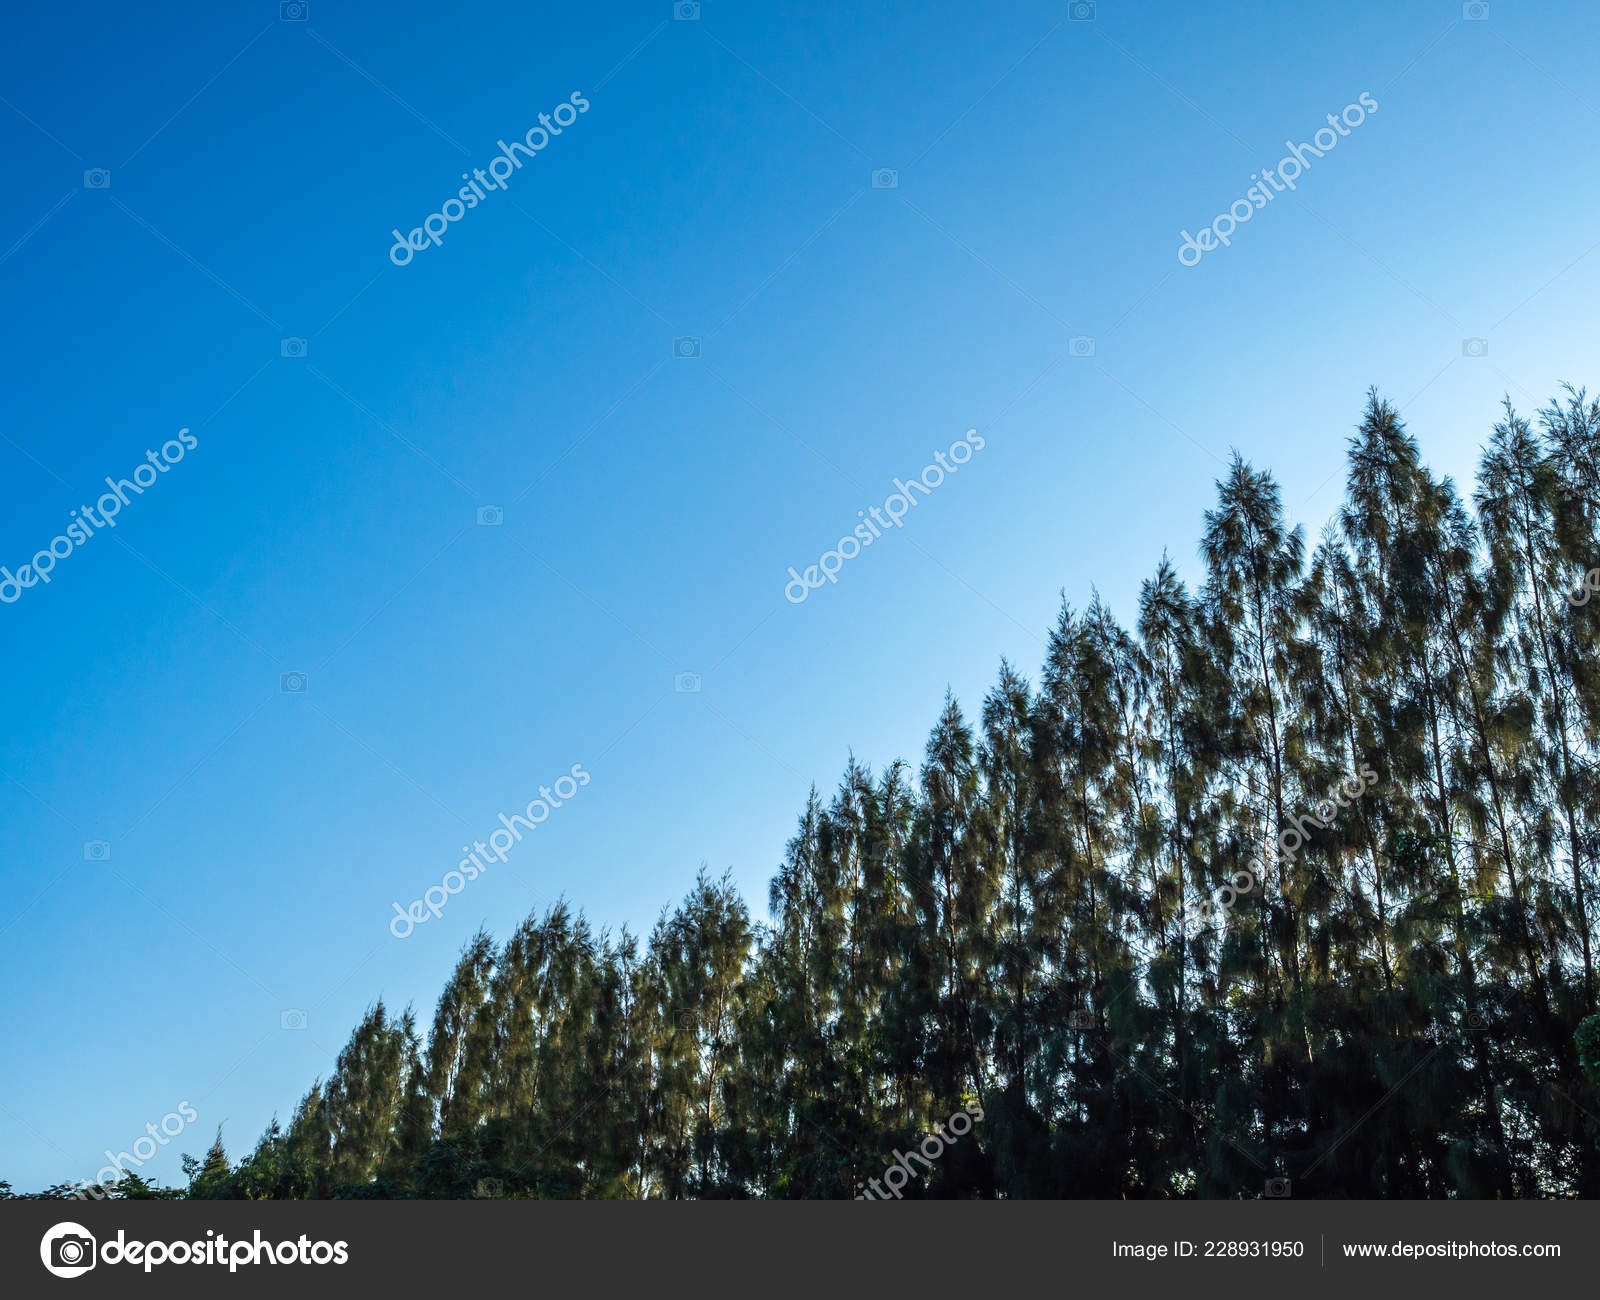

In [18]:
Image.open("./sample_data/no_cloud_1.jpg")

In [19]:
img_tens = load_img("./sample_data/no_cloud_1.jpg", transforms=val_transforms_list)

In [20]:
img_tens = img_tens[None]

In [21]:
def build_model(ckpt=None):
    model = torchvision.models.resnet18(pretrained=True)
    model.fc = nn.Linear(512, 2)
    if ckpt is not None:
        ckpt = torch.load(ckpt)
        model.load_state_dict(ckpt)
    return model

In [22]:
model = build_model('./best.pt')

In [23]:
def infere_image(model, img_tens):
    assert img_tens.size() == (1, 3, 224, 224)
    model = model.eval()
    with torch.no_grad():
        out = model(img_tens)
    probs = torch.softmax(out, dim=1)[0]
    return {
        "cloud": probs[0],
        "no_cloud": probs[1]
    }

In [24]:
infere_image(model, img_tens)

{'cloud': tensor(0.0117), 'no_cloud': tensor(0.9883)}